# Sales Prediction Using Machine Learning

<img src = "images/sales.jpeg" width = "500"/>


To create this amazing project!! 

We'll follow the below 6 steps framework..

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

# 1. Problem Definition

**The aim of Sales Prediction is predicting the sales based on the investment made for advertising on different modes like TV,Radio and Newspaper using machine learning.**

# 2. Data

The dataset is taken from Kaggle.
https://www.kaggle.com/datasets/bumba5341/advertisingcsv

# 3. Evaluation

> If we reach 95% accuracy to classify the species of iris flower during the proof
of concept , we'll pursue the project. 

# 4. Features
This is where you'll get different information about each of the features in your data.

**The columns represent advertising budgets for TV, radio, and newspaper, along with the sales figures.**

# 5. Modelling

## Getting tools ready 

In [36]:
# For Data analysis and visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling tools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Load the data
df = pd.read_csv("data sets\Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


The 'Unnamed: 0' column appears to be an index, which we can remove for clarity.

In [3]:
df.drop(columns = ["Unnamed: 0"] , inplace = True)

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Exploratary Data Analysis(EDA)

In [5]:
# Let's check some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
# Let's check some statiscal details
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
# Let's check missing values if there
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Investment for Advertising on TV  v/s Sales

In [8]:
pd.crosstab(df['TV'],df['Sales'])

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
TV,,,,,,,,,,,,,,,,,,,,,
0.7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
290.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
292.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


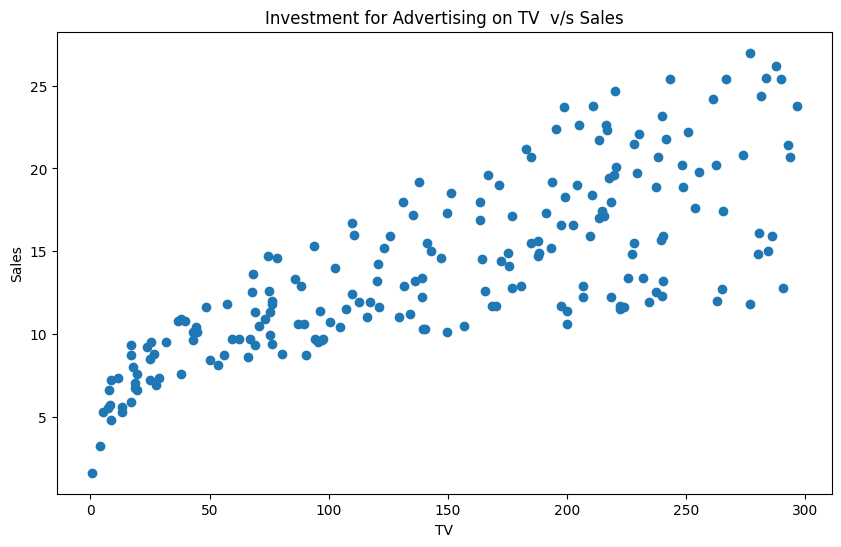

In [11]:
# Let's Visualise it
fig,ax = plt.subplots(figsize= (10,6))
plt.scatter(df["TV"],df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Investment for Advertising on TV  v/s Sales");

### Investment for advertising on Radio v/s sales

In [12]:
pd.crosstab(df["Radio"],df["Sales"])

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
Radio,,,,,,,,,,,,,,,,,,,,,
0.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


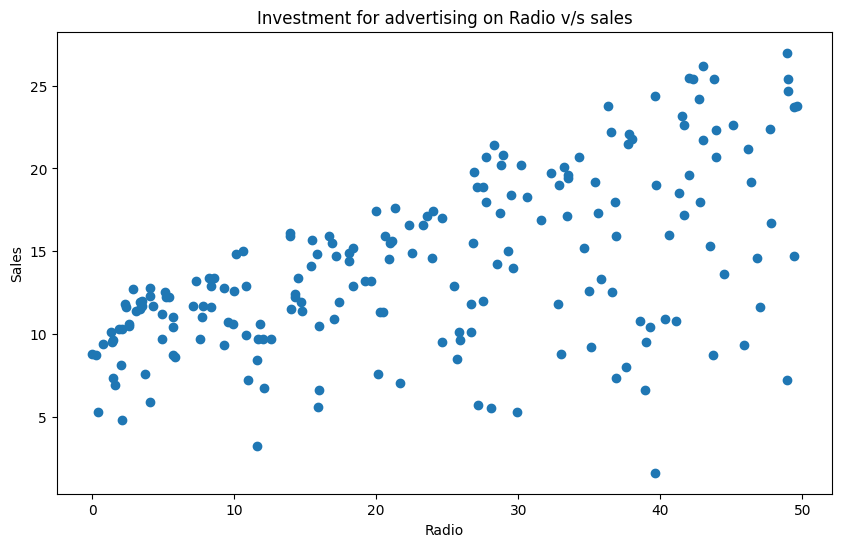

In [13]:
# Let's Visualise it
fig, ax=plt.subplots(figsize=(10,6))
plt.scatter(df["Radio"],df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Investment for advertising on Radio v/s sales");

### Investment for advertising in Newspaper v/s sales

In [14]:
pd.crosstab(df["Newspaper"],df["Sales"])

Sales,1.6,3.2,4.8,5.3,5.5,5.6,5.7,5.9,6.6,6.7,...,23.2,23.7,23.8,24.2,24.4,24.7,25.4,25.5,26.2,27.0
Newspaper,,,,,,,,,,,,,,,,,,,,,
0.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84.8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


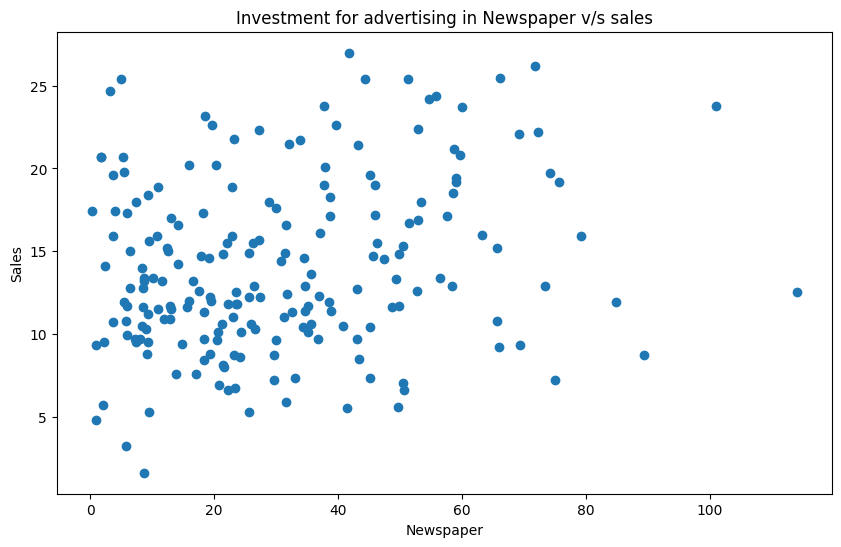

In [15]:
# Let's Visualise it 
fig , ax = plt.subplots(figsize=(10,6))
plt.scatter(df["Newspaper"],df["Sales"])
plt.title("Investment for advertising in Newspaper v/s sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales");

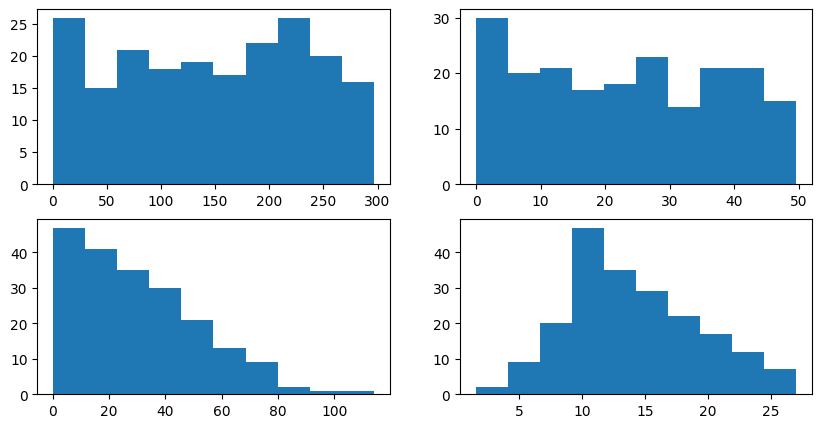

In [18]:
# Let's chech the distributio of each of the parameters
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows = 2,
                                           ncols = 2,figsize=(10,5))
ax1.hist(df["TV"])
ax2.hist(df["Radio"])
ax3.hist(df["Newspaper"])
ax4.hist(df["Sales"]);

#### Let's create the model for the same

In [19]:
# Split the data into train and test split
np.random.seed(42)

X = df.drop("Sales",axis=1)
y=df["Sales"]

In [20]:
np.random.seed(42)
X_train ,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [21]:
X_train.shape

(160, 3)

In [22]:
y_train.shape

(160,)

#### Let's use Random Forest for the modelling

In [24]:
model = RandomForestRegressor()

model.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
model.score(X_test,y_test)

0.9804602137549688

# 6.Evaluation

In [27]:
# First make predictions
y_pred = model.predict(X_test)

In [28]:
y_pred

array([17.799, 21.815, 20.47 ,  6.803, 23.133, 13.158, 22.681,  9.664,
       11.85 , 15.655,  7.427,  9.092, 12.121,  4.563, 10.489, 12.734,
        6.506, 16.481, 11.309, 19.499, 20.121, 12.708, 10.324, 22.229,
        9.985,  8.969, 22.444, 12.761,  9.993,  5.054, 11.617, 10.958,
       22.085,  8.302, 15.227, 20.368, 12.302, 20.464, 12.28 ,  7.679])